# Heart Failure Analysis

 Problem: Predict whether a patient has heart disease using clinical features.
 Target: HeartDisease (1 = disease present, 0 = no disease)

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [34]:
df = pd.read_csv('../data/raw/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [35]:
df.shape

(918, 12)

In [36]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [39]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [40]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

In [41]:
# Check if any Cholesterol values are zero

df[df['Cholesterol'] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
293,65,M,ASY,115,0,0,Normal,93,Y,0.0,Flat,1
294,32,M,TA,95,0,1,Normal,127,N,0.7,Up,1
295,61,M,ASY,105,0,1,Normal,110,Y,1.5,Up,1
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat,1
297,57,M,ASY,110,0,1,ST,131,Y,1.4,Up,1
...,...,...,...,...,...,...,...,...,...,...,...,...
514,43,M,ASY,122,0,0,Normal,120,N,0.5,Up,1
515,63,M,NAP,130,0,1,ST,160,N,3.0,Flat,0
518,48,M,NAP,102,0,1,ST,110,Y,1.0,Down,1
535,56,M,ASY,130,0,0,LVH,122,Y,1.0,Flat,1


In [42]:
# Count how many zero values exist

(df['Cholesterol'] == 0).sum()

np.int64(172)

In [43]:
# Check how many percentages are wrong

((df['Cholesterol'] == 0).sum() / len(df)) * 100

np.float64(18.736383442265794)

In [44]:
# 0 values in Cholesterol → replace with median

df['Cholesterol'].replace(0, np.nan, inplace=True)
df['Cholesterol'].fillna(df['Cholesterol'].median(), inplace=True)

C:\Users\ssaja\AppData\Local\Temp\ipykernel_25772\3025011450.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cholesterol'].replace(0, np.nan, inplace=True)


In [45]:
# RestingBP cannot be 0

(df['RestingBP'] == 0).sum() 

np.int64(1)

##### Blood pressure cannot be 0

In [46]:
# 0 values in RestingBP → replace with median

df['RestingBP'].replace(0, np.nan, inplace=True)
df['RestingBP'].fillna(df['RestingBP'].median(), inplace = True)

C:\Users\ssaja\AppData\Local\Temp\ipykernel_25772\4170937252.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['RestingBP'].replace(0, np.nan, inplace=True)


In [47]:
# MaxHR cannot be extremely low (like <40)

(df['MaxHR'] < 40).sum()

np.int64(0)

In [48]:
df['MaxHR'].min(), df['MaxHR'].max()


(60, 202)

In [49]:
#Age cannot be < 18 or > 100

print((df['Age'] < 18).sum())
print(df['Age'].max())
df['Age'].min()

0
77


28

In [50]:
# FastingBS should be only 0 or 1

df['FastingBS'].value_counts()

FastingBS
0    704
1    214
Name: count, dtype: int64

In [51]:
# ChestPainType must be valid categories

df['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [52]:
# ST_Slope must have valid categories

df['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

# Categorical columns checked and valid

In [53]:
# Check unique values in each categorical column

categorical_cols = ['Sex', 'ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

In [54]:
# to see all categories and counts

for col in categorical_cols:
    print(f"{col} unique values:\n{df[col].value_counts()}\n")

Sex unique values:
Sex
M    725
F    193
Name: count, dtype: int64

ChestPainType unique values:
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

RestingECG unique values:
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

ExerciseAngina unique values:
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64

ST_Slope unique values:
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64



In [55]:
# Convert object to category type

for col in categorical_cols:
    df[col] = df[col].astype('category')

In [56]:
df.dtypes

Age                  int64
Sex               category
ChestPainType     category
RestingBP          float64
Cholesterol        float64
FastingBS            int64
RestingECG        category
MaxHR                int64
ExerciseAngina    category
Oldpeak            float64
ST_Slope          category
HeartDisease         int64
dtype: object

# Univariate Analysis

#### Age distribution

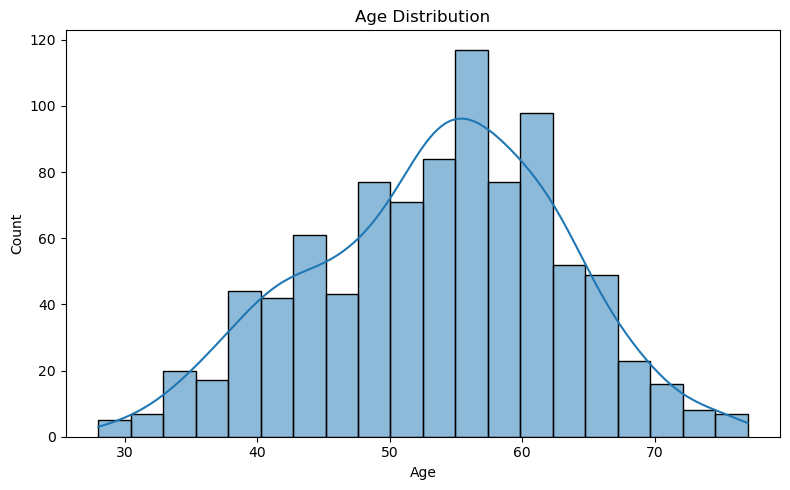

In [57]:
plt.figure(figsize = (8,5))
sns.histplot(df['Age'], bins=20, kde=True)  #good for showing the distribution, Added KDE → smooth curve over histogram → shows density
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.tight_layout()   # before saving/showing to prevent overlapping labels
plt.savefig('../images/age_distribution.png')
plt.show()


#### Max Heart Rate distribution

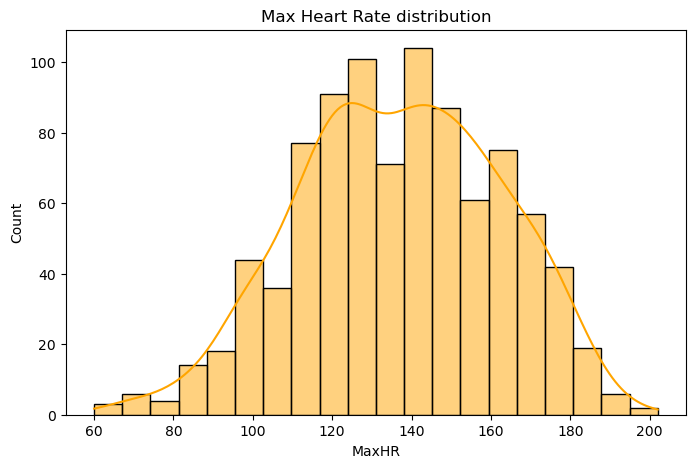

In [58]:
plt.figure(figsize=(8,5))
sns.histplot(df['MaxHR'], bins=20, kde=True, color= 'orange')
plt.title('Max Heart Rate distribution')
plt.xlabel('MaxHR')
plt.ylabel('Count')
plt.savefig('../images/max_heart_rate_distribution.png')
plt.show()


#### Chest Pain Type

C:\Users\ssaja\AppData\Local\Temp\ipykernel_25772\3294011338.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='ChestPainType', palette='viridis')


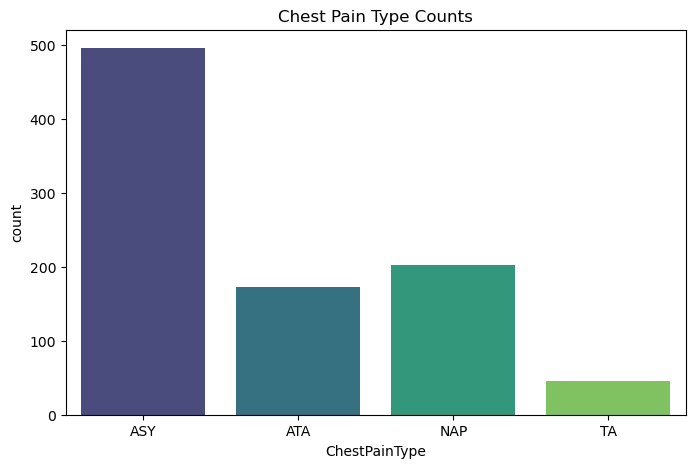

In [59]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='ChestPainType', palette='viridis')
plt.title('Chest Pain Type Counts')
plt.savefig('../images/Chest_Pain_Type_Counts.png')
plt.show()


#### Exercise Angina

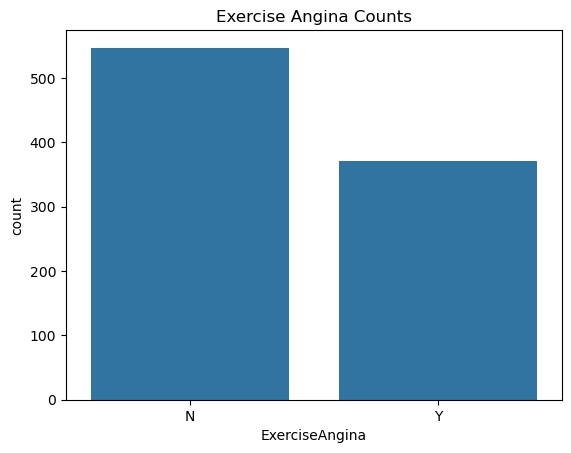

In [60]:
sns.countplot(data=df, x='ExerciseAngina')
plt.title('Exercise Angina Counts')
plt.savefig('../images/Exercise_Angina_Counts.png')
plt.show()


# Bivariate Analysis (Feature vs Target)

### Age vs HeartDisease

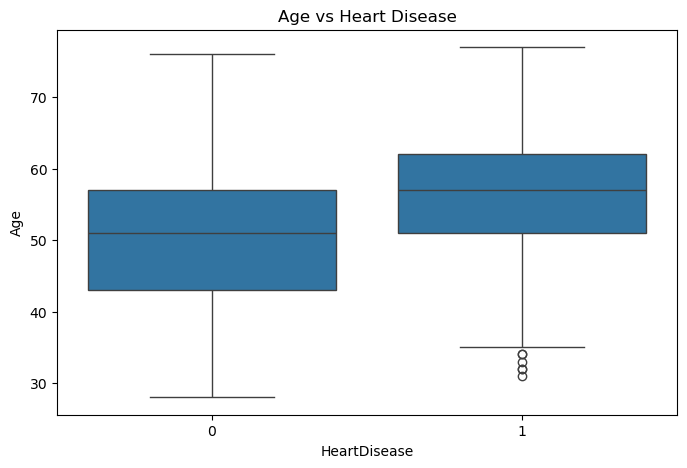

In [61]:
plt.figure(figsize=(8,5))
sns.boxplot(x='HeartDisease', y='Age', data=df)
plt.title('Age vs Heart Disease')
plt.savefig('../images/age_vs_heart_disease.png')
plt.show()


### MaxHR vs HeartDisease

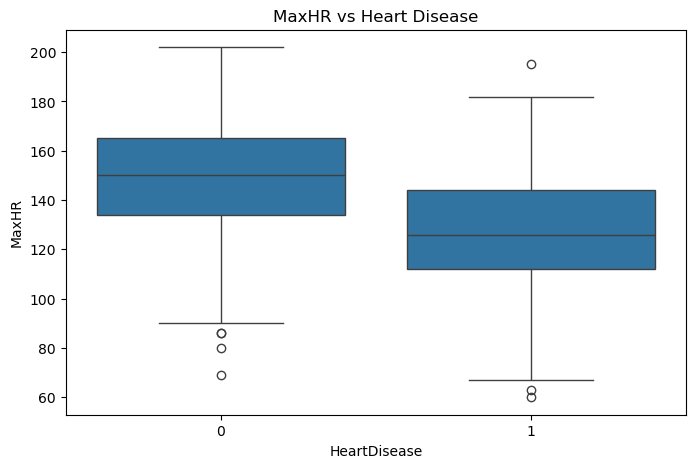

In [62]:
plt.figure(figsize=(8,5))
sns.boxplot(x='HeartDisease', y='MaxHR', data=df)
plt.title('MaxHR vs Heart Disease')
plt.savefig('../images/maxhr_vs_heart_disease.png')
plt.show()


### Chest Pain Type vs HeartDisease

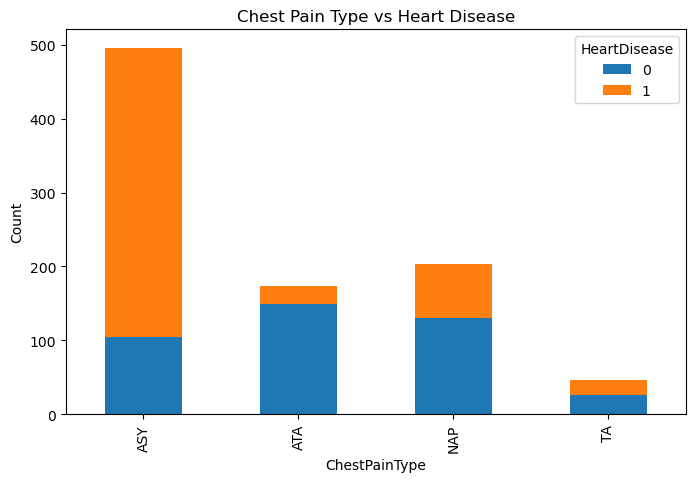

In [63]:
pd.crosstab(df['ChestPainType'], df['HeartDisease']).plot(kind='bar', stacked = True, figsize=(8,5))
plt.title('Chest Pain Type vs Heart Disease')
plt.ylabel('Count')
plt.savefig('../images/chestpain_vs_heart_disease.png')
plt.show()


# Correlation

## Numeric Features Correlation

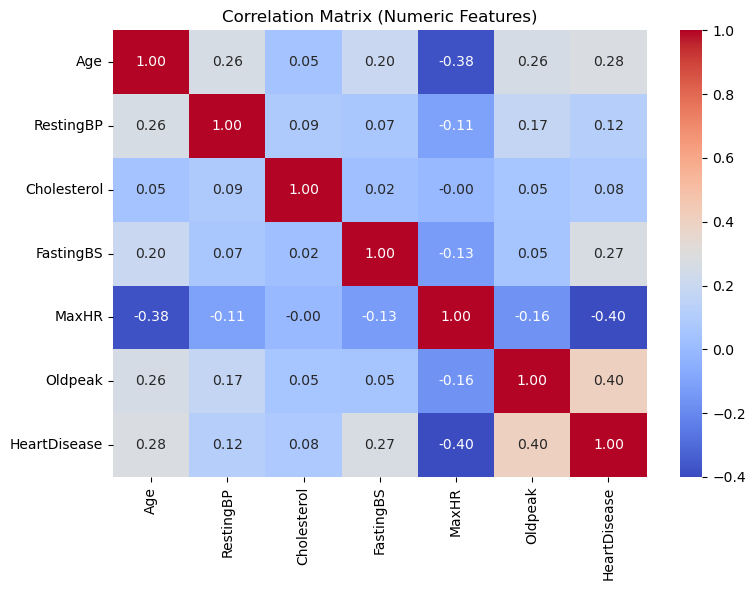

In [64]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr_matrix = df[numeric_cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Numeric Features)')
plt.tight_layout()
plt.savefig('../images/numeric_correlation_matrix.png')
plt.show()

## Top Features Correlated with Target

In [65]:
target_corr = corr_matrix['HeartDisease'].sort_values(ascending=False)
print("=== Features most correlated with HeartDisease (Numeric only) ===")
print(target_corr)

=== Features most correlated with HeartDisease (Numeric only) ===
HeartDisease    1.000000
Oldpeak         0.403951
Age             0.282039
FastingBS       0.267291
RestingBP       0.117798
Cholesterol     0.076114
MaxHR          -0.400421
Name: HeartDisease, dtype: float64


## Encode Categorical Features for Extended Correlation

In [66]:
df_encoded = df.copy()
categorical_cols = ['Sex', 'ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

# Convert categories to numeric codes
for col in categorical_cols:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

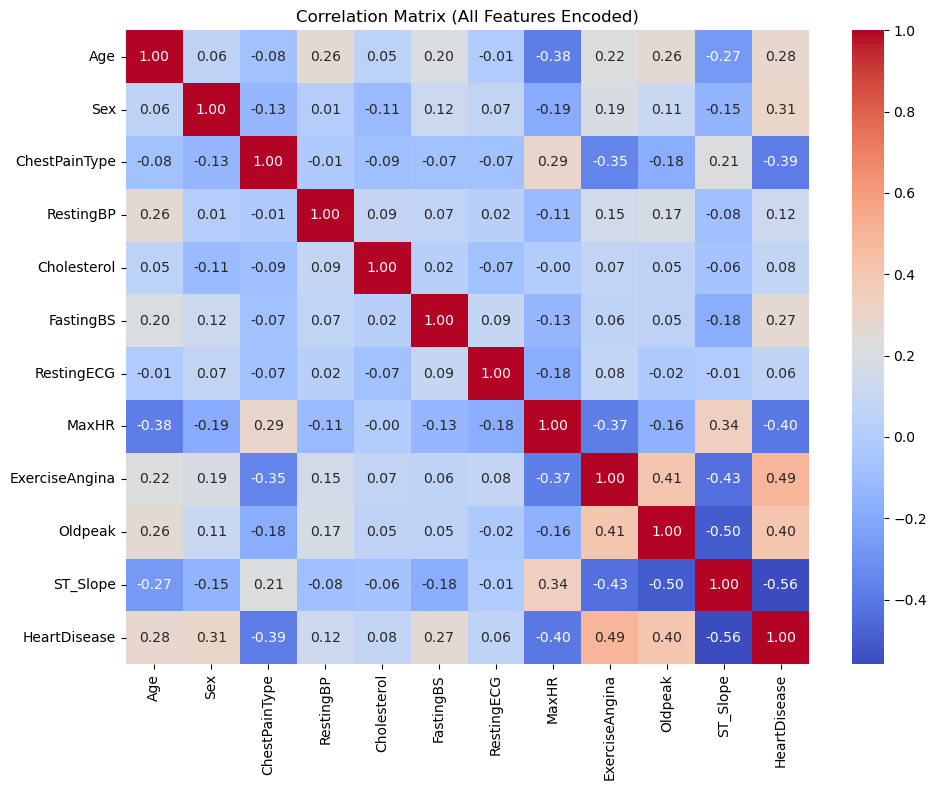

In [67]:


# Compute correlation including encoded categorical features
corr_matrix_encoded = df_encoded.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix_encoded, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (All Features Encoded)')
plt.tight_layout()
plt.savefig('../images/encoded_correlation_matrix.png')
plt.show()



In [68]:
# Top features including encoded categoricals
target_corr_encoded = corr_matrix_encoded['HeartDisease'].sort_values(ascending=False)
print("\n=== Features most correlated with HeartDisease (All Features) ===")
print(target_corr_encoded)


=== Features most correlated with HeartDisease (All Features) ===
HeartDisease      1.000000
ExerciseAngina    0.494282
Oldpeak           0.403951
Sex               0.305445
Age               0.282039
FastingBS         0.267291
RestingBP         0.117798
Cholesterol       0.076114
RestingECG        0.057384
ChestPainType    -0.386828
MaxHR            -0.400421
ST_Slope         -0.558771
Name: HeartDisease, dtype: float64


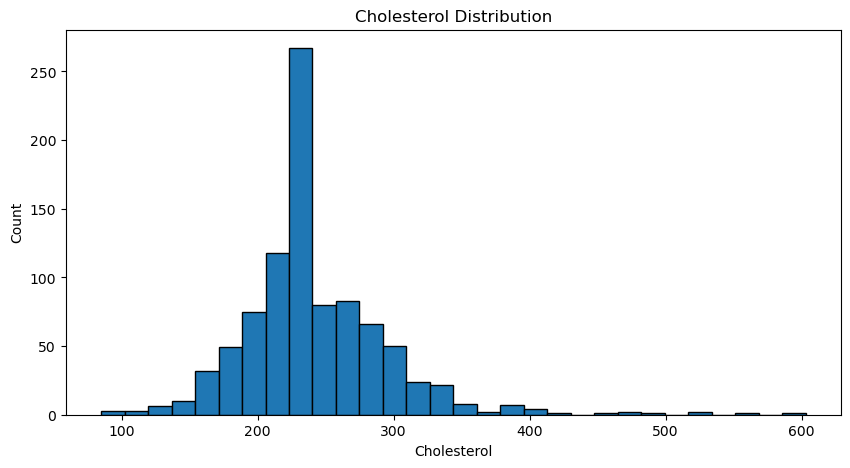

In [69]:
import matplotlib.pyplot as plt

# Create a simple histogram
plt.figure(figsize=(10, 5))
plt.hist(df['Cholesterol'], bins=30, edgecolor='black')
plt.title('Cholesterol Distribution')
plt.xlabel('Cholesterol')
plt.ylabel('Count')
plt.show()

In [70]:
# Check all numeric columns for zeros - verify what's cleaned
numeric_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']

print("Checking for zeros in each column:")
print("="*50)
for col in numeric_cols:
    if col in df.columns:
        zero_count = (df[col] == 0).sum()
        print(f"{col:15s}: {zero_count} zeros")

Checking for zeros in each column:
Age            : 0 zeros
RestingBP      : 0 zeros
Cholesterol    : 0 zeros
FastingBS      : 704 zeros
MaxHR          : 0 zeros
Oldpeak        : 368 zeros


# Data Preprocessing & Feature Engineering

In [71]:
# Create Age Groups
# We'll use pd.cut() to divide ages into bins

df['AgeGroup'] = pd.cut(df['Age'], 
                        bins= [0, 45, 55, 65, 100], 
                        labels = ['Young', 'Middle', 'Senior', 'Elderly'])

In [72]:
print(df['AgeGroup'].value_counts().sort_index())

AgeGroup
Young      196
Middle     316
Senior     324
Elderly     82
Name: count, dtype: int64


### Cholesterol per Age

##### Sometimes, the absolute cholesterol value is less meaningful than relative to age.

In [73]:
# Create cholesterol per age ratio
df['Cholesterol_per_Age'] = df['Cholesterol'] / df['Age']
df['Cholesterol_per_Age'].describe()

count    918.000000
mean       4.693778
std        1.373568
min        1.486842
25%        3.822581
50%        4.430354
75%        5.306818
max       16.531250
Name: Cholesterol_per_Age, dtype: float64

#### Heart Rate Reserve 

###### Difference between MaxHR and RestingBP could indicate fitness or heart stress.

In [74]:
df['HR_Reserve'] = df['MaxHR'] - df['RestingBP']
df['HR_Reserve'] 

0      32.0
1      -4.0
2     -32.0
3     -30.0
4     -28.0
       ... 
913    22.0
914    -3.0
915   -15.0
916    44.0
917    35.0
Name: HR_Reserve, Length: 918, dtype: float64

#### Oldpeak per Age

###### Depression (Oldpeak) relative to age might highlight abnormal stress patterns.

In [75]:
df['Oldpeak_per_Age'] = df['Oldpeak'] / df['Age']
df['Oldpeak_per_Age']

0      0.000000
1      0.020408
2      0.000000
3      0.031250
4      0.000000
         ...   
913    0.026667
914    0.050000
915    0.021053
916    0.000000
917    0.000000
Name: Oldpeak_per_Age, Length: 918, dtype: float64

#### FastingBS + ExerciseAngina Combined

###### Sometimes, combining binary features creates useful signals.
#### COMBINED FEATURE: HIGH BLOOD SUGAR + ANGINA
###### FastingBS: 1 = high, ExerciseAngina: 1 = angina present.
###### If both are 1 → high risk signal.

In [76]:
df[['FastingBS', 'ExerciseAngina']].dtypes


FastingBS            int64
ExerciseAngina    category
dtype: object

In [77]:
df['ExerciseAngina'].unique()


['N', 'Y']
Categories (2, object): ['N', 'Y']

In [78]:
df['ExerciseAngina'] = df['ExerciseAngina'].map({'N': 0, 'Y': 1})
df['ExerciseAngina'] = df['ExerciseAngina'].astype('int64')


In [79]:
df['ExerciseAngina'].dtypes

dtype('int64')

In [80]:
df['HighBS_And_Angina'] = df['FastingBS'] * df['ExerciseAngina']


In [81]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,AgeGroup,Cholesterol_per_Age,HR_Reserve,Oldpeak_per_Age,HighBS_And_Angina
0,40,M,ATA,140.0,289.0,0,Normal,172,0,0.0,Up,0,Young,7.225000,32.0,0.000000,0
1,49,F,NAP,160.0,180.0,0,Normal,156,0,1.0,Flat,1,Middle,3.673469,-4.0,0.020408,0
2,37,M,ATA,130.0,283.0,0,ST,98,0,0.0,Up,0,Young,7.648649,-32.0,0.000000,0
3,48,F,ASY,138.0,214.0,0,Normal,108,1,1.5,Flat,1,Middle,4.458333,-30.0,0.031250,0
4,54,M,NAP,150.0,195.0,0,Normal,122,0,0.0,Up,0,Middle,3.611111,-28.0,0.000000,0


# Encoding Categorical Variables

### Label Encoding (Binary Categories)

In [82]:
df['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

In [83]:
df['Sex'] = df['Sex'].map({'M': 1, 'F': 0})
df[['Sex']].head()

,Sex
0,1
1,0
2,1
3,0
4,1


### One-Hot Encoding (Multi-class Categories)

In [84]:
df['ChestPainType'].value_counts()


ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

In [85]:
# One-Hot Encoding with drop_first=True
chest_pain_encoded = pd.get_dummies(df['ChestPainType'], prefix='ChestPain', drop_first=True)

print("New columns created:")
print(chest_pain_encoded.columns.tolist())
print(f"\nNumber of columns: {len(chest_pain_encoded.columns)}")  # Should be 3, not 4

print("\nFirst few rows:")
print(chest_pain_encoded.head(10))

New columns created:
['ChestPain_ATA', 'ChestPain_NAP', 'ChestPain_TA']

Number of columns: 3

First few rows:
   ChestPain_ATA  ChestPain_NAP  ChestPain_TA
0           True          False         False
1          False           True         False
2           True          False         False
3          False          False         False
4          False           True         False
5          False           True         False
6           True          False         False
7           True          False         False
8          False          False         False
9           True          False         False


In [86]:
df['RestingECG'].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

In [87]:
# One-Hot Encoding for RestingECG with drop_first=True
resting_ecg_encoded = pd.get_dummies(df['RestingECG'], prefix='RestingECG', drop_first=True)

print("New columns created:")
print(resting_ecg_encoded.columns.tolist())
print(f"Number of columns: {len(resting_ecg_encoded.columns)}")  # Should be 2

print("\nFirst few rows:")
print(resting_ecg_encoded.head())

New columns created:
['RestingECG_Normal', 'RestingECG_ST']
Number of columns: 2

First few rows:
   RestingECG_Normal  RestingECG_ST
0               True          False
1               True          False
2              False           True
3               True          False
4               True          False


In [88]:
df['ST_Slope'].value_counts()

ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64

In [89]:
# One-Hot Encoding for ST_Slope with drop_first=True
st_slope_encoded = pd.get_dummies(df['ST_Slope'], prefix='ST_Slope', drop_first=True)

print("New columns created:")
print(st_slope_encoded.columns.tolist())
print(f"Number of columns: {len(st_slope_encoded.columns)}")  # Should be 2

print("\nFirst few rows:")
print(st_slope_encoded.head())

New columns created:
['ST_Slope_Flat', 'ST_Slope_Up']
Number of columns: 2

First few rows:
   ST_Slope_Flat  ST_Slope_Up
0          False         True
1           True        False
2          False         True
3           True        False
4          False         True


In [90]:
df['AgeGroup'].value_counts()

AgeGroup
Senior     324
Middle     316
Young      196
Elderly     82
Name: count, dtype: int64

In [91]:
# One-Hot Encoding for AgeGroup with drop_first=True
age_group_encoded = pd.get_dummies(df['AgeGroup'], prefix='AgeGroup', drop_first=True)

print("New columns created:")
print(age_group_encoded.columns.tolist())
print(f"Number of columns: {len(age_group_encoded.columns)}")  # Should be 3

print("\nFirst few rows:")
print(age_group_encoded.head())

New columns created:
['AgeGroup_Middle', 'AgeGroup_Senior', 'AgeGroup_Elderly']
Number of columns: 3

First few rows:
   AgeGroup_Middle  AgeGroup_Senior  AgeGroup_Elderly
0            False            False             False
1             True            False             False
2            False            False             False
3             True            False             False
4             True            False             False


In [92]:
# Concatenate all encoded columns to main dataframe
df = pd.concat([df, chest_pain_encoded, resting_ecg_encoded, st_slope_encoded, age_group_encoded], axis=1)

# Drop the original categorical columns
df = df.drop(['ChestPainType', 'RestingECG', 'ST_Slope', 'AgeGroup'], axis=1)

print("Updated DataFrame:")
print(f"Shape: {df.shape}")
print(f"\nColumns: {df.columns.tolist()}")

# Check data types - should all be numeric now!
print("\nData types:")
print(df.dtypes)

Updated DataFrame:
Shape: (918, 23)

Columns: ['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'HeartDisease', 'Cholesterol_per_Age', 'HR_Reserve', 'Oldpeak_per_Age', 'HighBS_And_Angina', 'ChestPain_ATA', 'ChestPain_NAP', 'ChestPain_TA', 'RestingECG_Normal', 'RestingECG_ST', 'ST_Slope_Flat', 'ST_Slope_Up', 'AgeGroup_Middle', 'AgeGroup_Senior', 'AgeGroup_Elderly']

Data types:
Age                       int64
Sex                    category
RestingBP               float64
Cholesterol             float64
FastingBS                 int64
MaxHR                     int64
ExerciseAngina            int64
Oldpeak                 float64
HeartDisease              int64
Cholesterol_per_Age     float64
HR_Reserve              float64
Oldpeak_per_Age         float64
HighBS_And_Angina         int64
ChestPain_ATA              bool
ChestPain_NAP              bool
ChestPain_TA               bool
RestingECG_Normal          bool
RestingECG_ST              bool


In [93]:
df['Sex'] = df['Sex'].astype(int)

# Convert all boolean columns to int (0 and 1)
bool_columns = df.select_dtypes(include=['bool']).columns
df[bool_columns] = df[bool_columns].astype(int)

In [94]:
df.dtypes

Age                      int64
Sex                      int64
RestingBP              float64
Cholesterol            float64
FastingBS                int64
MaxHR                    int64
ExerciseAngina           int64
Oldpeak                float64
HeartDisease             int64
Cholesterol_per_Age    float64
HR_Reserve             float64
Oldpeak_per_Age        float64
HighBS_And_Angina        int64
ChestPain_ATA            int64
ChestPain_NAP            int64
ChestPain_TA             int64
RestingECG_Normal        int64
RestingECG_ST            int64
ST_Slope_Flat            int64
ST_Slope_Up              int64
AgeGroup_Middle          int64
AgeGroup_Senior          int64
AgeGroup_Elderly         int64
dtype: object

In [95]:
# Verify all numeric

print("Check: All columns numeric?")
all_numeric = df.dtypes.apply(lambda x: x in ['int64', 'float64']).all()
print(f"Result: {all_numeric}")

Check: All columns numeric?
Result: True


# Feature Scaling

In [96]:
X = df.drop('HeartDisease', axis = 1)
y = df['HeartDisease']

In [97]:
print("Features (X):")
print(f"Shape: {X.shape}")
print(f"Columns: {X.columns.tolist()}")

print()
print("Target (y):")
print(f"Shape: {y.shape}")
print(f"Values: {y.value_counts()}")

Features (X):
Shape: (918, 22)
Columns: ['Age', 'Sex', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'Cholesterol_per_Age', 'HR_Reserve', 'Oldpeak_per_Age', 'HighBS_And_Angina', 'ChestPain_ATA', 'ChestPain_NAP', 'ChestPain_TA', 'RestingECG_Normal', 'RestingECG_ST', 'ST_Slope_Flat', 'ST_Slope_Up', 'AgeGroup_Middle', 'AgeGroup_Senior', 'AgeGroup_Elderly']

Target (y):
Shape: (918,)
Values: HeartDisease
1    508
0    410
Name: count, dtype: int64


In [98]:
from sklearn.model_selection import train_test_split

# Split: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,      # 20% for testing
    random_state=42,    # For reproducibility
    stratify=y          # Keep same class ratio in train/test
)

In [99]:
print(f"Training set: {X_train.shape}")
print(f"Test set: {X_test.shape}")

print("\n" + "="*50)
print("Class distribution in training set:")
print(y_train.value_counts())
print(f"Percentage: {y_train.value_counts(normalize=True) * 100}")

print("\n" + "="*50)
print("Class distribution in test set:")
print(y_test.value_counts())
print(f"Percentage: {y_test.value_counts(normalize=True) * 100}")

Training set: (734, 22)
Test set: (184, 22)

Class distribution in training set:
HeartDisease
1    406
0    328
Name: count, dtype: int64
Percentage: HeartDisease
1    55.313351
0    44.686649
Name: proportion, dtype: float64

Class distribution in test set:
HeartDisease
1    102
0     82
Name: count, dtype: int64
Percentage: HeartDisease
1    55.434783
0    44.565217
Name: proportion, dtype: float64


In [100]:
# Columns that should be scaled (continuous features)
columns_to_scale = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 
                    'Cholesterol_per_Age', 'HR_Reserve', 'Oldpeak_per_Age']

# Columns that should NOT be scaled (binary 0/1)
columns_not_to_scale = ['Sex', 'FastingBS', 'ExerciseAngina', 'HighBS_And_Angina',
                        'ChestPain_ATA', 'ChestPain_NAP', 'ChestPain_TA',
                        'RestingECG_Normal', 'RestingECG_ST',
                        'ST_Slope_Flat', 'ST_Slope_Up',
                        'AgeGroup_Middle', 'AgeGroup_Senior', 'AgeGroup_Elderly']

print("Columns TO SCALE:")
print(columns_to_scale)
print(f"\nTotal: {len(columns_to_scale)} columns")

print()
print("Columns NOT to scale (already 0/1):")
print(columns_not_to_scale)
print(f"\nTotal: {len(columns_not_to_scale)} columns")

# Verify we have all columns
print()
print(f"Total columns in X: {X_train.shape[1]}")
print(f"Columns to scale: {len(columns_to_scale)}")
print(f"Columns not to scale: {len(columns_not_to_scale)}")
print(f"Sum: {len(columns_to_scale) + len(columns_not_to_scale)}")

Columns TO SCALE:
['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak', 'Cholesterol_per_Age', 'HR_Reserve', 'Oldpeak_per_Age']

Total: 8 columns

Columns NOT to scale (already 0/1):
['Sex', 'FastingBS', 'ExerciseAngina', 'HighBS_And_Angina', 'ChestPain_ATA', 'ChestPain_NAP', 'ChestPain_TA', 'RestingECG_Normal', 'RestingECG_ST', 'ST_Slope_Flat', 'ST_Slope_Up', 'AgeGroup_Middle', 'AgeGroup_Senior', 'AgeGroup_Elderly']

Total: 14 columns

Total columns in X: 22
Columns to scale: 8
Columns not to scale: 14
Sum: 22


In [101]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit on TRAINING data only and transform
X_train_scaled = X_train.copy()
X_train_scaled[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])

# Transform TEST data using the same scaler (NO fit!)
X_test_scaled = X_test.copy()
X_test_scaled[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

print("✓ Scaling Complete!")
print("="*50)

# Check the scaled values
print("\nBefore scaling (Training set sample):")
print(X_train[columns_to_scale].head())

print("\n" + "="*50)
print("After scaling (Training set sample):")
print(X_train_scaled[columns_to_scale].head())

print("\n" + "="*50)
print("Scaled column statistics (should be ~0 mean, ~1 std):")
print(X_train_scaled[columns_to_scale].describe())

✓ Scaling Complete!

Before scaling (Training set sample):
     Age  RestingBP  Cholesterol  MaxHR  Oldpeak  Cholesterol_per_Age  \
485   63      139.0        217.0    128      1.2             3.444444   
486   55      110.0        214.0    180      0.4             3.890909   
117   59      130.0        338.0    130      1.5             5.728814   
361   47      160.0        237.0    124      0.0             5.042553   
296   50      145.0        237.0    139      0.7             4.740000   

     HR_Reserve  Oldpeak_per_Age  
485       -11.0         0.019048  
486        70.0         0.007273  
117         0.0         0.025424  
361       -36.0         0.000000  
296        -6.0         0.014000  

After scaling (Training set sample):
          Age  RestingBP  Cholesterol     MaxHR   Oldpeak  \
485  0.970012   0.339016    -0.514028 -0.324520  0.317046   
486  0.122028  -1.266031    -0.569339  1.689837 -0.440356   
117  0.546020  -0.159102     1.716858 -0.247045  0.601071   
361 -0.725

In [102]:
import os
import pandas as pd

# Create folders if they don't exist
os.makedirs('data/raw', exist_ok=True)
os.makedirs('data/processed', exist_ok=True)

# Convert scaled arrays to DataFrames
X_train_final = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_final = pd.DataFrame(X_test_scaled, columns=X_test.columns)
y_train_final = pd.Series(y_train.values, name='HeartDisease')
y_test_final = pd.Series(y_test.values, name='HeartDisease')

# Save to processed folder
X_train_final.to_csv('../data/processed/X_train_processed.csv', index=False)
X_test_final.to_csv('../data/processed/X_test_processed.csv', index=False)
y_train_final.to_csv('../data/processed/y_train.csv', index=False)
y_test_final.to_csv('../data/processed/y_test.csv', index=False)


print("File sizes:")
print(f"X_train: {X_train_final.shape}")
print(f"X_test: {X_test_final.shape}")
print(f"y_train: {y_train_final.shape}")
print(f"y_test: {y_test_final.shape}")

File sizes:
X_train: (734, 22)
X_test: (184, 22)
y_train: (734,)
y_test: (184,)


## Logistic Regression

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create the model
model = LogisticRegression(random_state=42, max_iter=1000)

# Train the model on training data
print("Training the model...")
model.fit(X_train_scaled, y_train)

print("Model trained successfully!")


Training the model...
Model trained successfully!


In [104]:
# Make predictions on training data
y_train_pred = model.predict(X_train_scaled)

# Make predictions on test data
y_test_pred = model.predict(X_test_scaled)

print("✓ Predictions made!")
print("="*50)

# Let's look at a few predictions
print("\nFirst 10 predictions on test data:")
print("Actual vs Predicted:")
for i in range(10):
    actual = y_test.iloc[i]
    predicted = y_test_pred[i]
    match = "✓" if actual == predicted else "✗"
    print(f"Sample {i+1}: Actual={actual}, Predicted={predicted} {match}")

✓ Predictions made!

First 10 predictions on test data:
Actual vs Predicted:
Sample 1: Actual=1, Predicted=1 ✓
Sample 2: Actual=1, Predicted=0 ✗
Sample 3: Actual=1, Predicted=1 ✓
Sample 4: Actual=1, Predicted=1 ✓
Sample 5: Actual=0, Predicted=0 ✓
Sample 6: Actual=0, Predicted=0 ✓
Sample 7: Actual=0, Predicted=0 ✓
Sample 8: Actual=1, Predicted=0 ✗
Sample 9: Actual=0, Predicted=0 ✓
Sample 10: Actual=1, Predicted=1 ✓


In [105]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("MODEL PERFORMANCE")
print("="*50)
print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

print("\n" + "="*50)
print("DETAILED CLASSIFICATION REPORT (Test Data):")
print("="*50)
print(classification_report(y_test, y_test_pred, 
                          target_names=['No Disease (0)', 'Disease (1)']))

print("\n" + "="*50)
print("CONFUSION MATRIX (Test Data):")
print("="*50)
cm = confusion_matrix(y_test, y_test_pred)
print(cm)
print("\nExplanation:")
print(f"True Negatives (Correctly predicted No Disease): {cm[0][0]}")
print(f"False Positives (Wrongly predicted Disease): {cm[0][1]}")
print(f"False Negatives (Wrongly predicted No Disease): {cm[1][0]}")
print(f"True Positives (Correctly predicted Disease): {cm[1][1]}")

MODEL PERFORMANCE
Training Accuracy: 0.8583 (85.83%)
Test Accuracy: 0.8804 (88.04%)

DETAILED CLASSIFICATION REPORT (Test Data):
                precision    recall  f1-score   support

No Disease (0)       0.87      0.87      0.87        82
   Disease (1)       0.89      0.89      0.89       102

      accuracy                           0.88       184
     macro avg       0.88      0.88      0.88       184
  weighted avg       0.88      0.88      0.88       184


CONFUSION MATRIX (Test Data):
[[71 11]
 [11 91]]

Explanation:
True Negatives (Correctly predicted No Disease): 71
False Positives (Wrongly predicted Disease): 11
False Negatives (Wrongly predicted No Disease): 11
True Positives (Correctly predicted Disease): 91


# Decision Tree

In [107]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

print("="*70)
print("TRAINING DECISION TREE")
print("="*70)

# Create the model
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
print("\nTraining...")
start_time = time.time()
dt_model.fit(X_train_scaled, y_train)
training_time = time.time() - start_time

print(f"✓ Training completed in {training_time:.4f} seconds")

# Make predictions
print("\nMaking predictions...")
dt_train_pred = dt_model.predict(X_train_scaled)
dt_test_pred = dt_model.predict(X_test_scaled)

print("✓ Predictions completed!")

TRAINING DECISION TREE

Training...
✓ Training completed in 0.0205 seconds

Making predictions...
✓ Predictions completed!


In [108]:
# Calculate metrics
train_accuracy = accuracy_score(y_train, dt_train_pred)
test_accuracy = accuracy_score(y_test, dt_test_pred)

print("\n" + "="*70)
print("DECISION TREE - MODEL PERFORMANCE")
print("="*70)
print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")

print("\n" + "="*70)
print("DETAILED CLASSIFICATION REPORT (Test Data):")
print("="*70)
print(classification_report(y_test, dt_test_pred, 
                          target_names=['No Disease (0)', 'Disease (1)']))

print("\n" + "="*70)
print("CONFUSION MATRIX (Test Data):")
print("="*70)
cm = confusion_matrix(y_test, dt_test_pred)
print(cm)
print("\nExplanation:")
print(f"True Negatives (Correctly predicted No Disease): {cm[0][0]}")
print(f"False Positives (Wrongly predicted Disease): {cm[0][1]}")
print(f"False Negatives (Wrongly predicted No Disease): {cm[1][0]}")
print(f"True Positives (Correctly predicted Disease): {cm[1][1]}")


DECISION TREE - MODEL PERFORMANCE
Training Accuracy: 1.0000 (100.00%)
Test Accuracy: 0.7609 (76.09%)

DETAILED CLASSIFICATION REPORT (Test Data):
                precision    recall  f1-score   support

No Disease (0)       0.73      0.73      0.73        82
   Disease (1)       0.78      0.78      0.78       102

      accuracy                           0.76       184
     macro avg       0.76      0.76      0.76       184
  weighted avg       0.76      0.76      0.76       184


CONFUSION MATRIX (Test Data):
[[60 22]
 [22 80]]

Explanation:
True Negatives (Correctly predicted No Disease): 60
False Positives (Wrongly predicted Disease): 22
False Negatives (Wrongly predicted No Disease): 22
True Positives (Correctly predicted Disease): 80


# Random Forest Code

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

print("="*70)
print("TRAINING RANDOM FOREST")
print("="*70)

# Create and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
print("\nTraining with 100 trees...")
start_time = time.time()
rf_model.fit(X_train_scaled, y_train)
training_time = time.time() - start_time
print(f"✓ Training completed in {training_time:.4f} seconds")

# Make predictions
print("\nMaking predictions...")
rf_train_pred = rf_model.predict(X_train_scaled)
rf_test_pred = rf_model.predict(X_test_scaled)
print("✓ Predictions completed!")

# Calculate metrics
train_accuracy = accuracy_score(y_train, rf_train_pred)
test_accuracy = accuracy_score(y_test, rf_test_pred)

# Display results
print("\n" + "="*70)
print("RANDOM FOREST - MODEL PERFORMANCE")
print("="*70)
print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Overfitting Gap: {(train_accuracy - test_accuracy)*100:.2f}%")

print("\n" + "="*70)
print("DETAILED CLASSIFICATION REPORT (Test Data):")
print("="*70)
print(classification_report(y_test, rf_test_pred, 
                          target_names=['No Disease (0)', 'Disease (1)']))

print("\n" + "="*70)
print("CONFUSION MATRIX (Test Data):")
print("="*70)
cm = confusion_matrix(y_test, rf_test_pred)
print(cm)
print("\nExplanation:")
print(f"True Negatives (Correctly predicted No Disease): {cm[0][0]}")
print(f"False Positives (Wrongly predicted Disease): {cm[0][1]}")
print(f"False Negatives (Wrongly predicted No Disease): {cm[1][0]}")
print(f"True Positives (Correctly predicted Disease): {cm[1][1]}")

TRAINING RANDOM FOREST

Training with 100 trees...
✓ Training completed in 0.4068 seconds

Making predictions...
✓ Predictions completed!

RANDOM FOREST - MODEL PERFORMANCE
Training Accuracy: 1.0000 (100.00%)
Test Accuracy: 0.8641 (86.41%)
Overfitting Gap: 13.59%

DETAILED CLASSIFICATION REPORT (Test Data):
                precision    recall  f1-score   support

No Disease (0)       0.84      0.85      0.85        82
   Disease (1)       0.88      0.87      0.88       102

      accuracy                           0.86       184
     macro avg       0.86      0.86      0.86       184
  weighted avg       0.86      0.86      0.86       184


CONFUSION MATRIX (Test Data):
[[70 12]
 [13 89]]

Explanation:
True Negatives (Correctly predicted No Disease): 70
False Positives (Wrongly predicted Disease): 12
False Negatives (Wrongly predicted No Disease): 13
True Positives (Correctly predicted Disease): 89


# SVM (Support Vector Machine)

In [110]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

print("="*70)
print("TRAINING SUPPORT VECTOR MACHINE (SVM)")
print("="*70)

# Create and train the model
svm_model = SVC(kernel='rbf', random_state=42)
print("\nTraining with RBF kernel...")
start_time = time.time()
svm_model.fit(X_train_scaled, y_train)
training_time = time.time() - start_time
print(f"✓ Training completed in {training_time:.4f} seconds")

# Make predictions
print("\nMaking predictions...")
svm_train_pred = svm_model.predict(X_train_scaled)
svm_test_pred = svm_model.predict(X_test_scaled)
print("✓ Predictions completed!")

# Calculate metrics
train_accuracy = accuracy_score(y_train, svm_train_pred)
test_accuracy = accuracy_score(y_test, svm_test_pred)

# Display results
print("\n" + "="*70)
print("SVM - MODEL PERFORMANCE")
print("="*70)
print(f"Training Accuracy: {train_accuracy:.4f} ({train_accuracy*100:.2f}%)")
print(f"Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"Overfitting Gap: {(train_accuracy - test_accuracy)*100:.2f}%")

print("\n" + "="*70)
print("DETAILED CLASSIFICATION REPORT (Test Data):")
print("="*70)
print(classification_report(y_test, svm_test_pred, 
                          target_names=['No Disease (0)', 'Disease (1)']))

print("\n" + "="*70)
print("CONFUSION MATRIX (Test Data):")
print("="*70)
cm = confusion_matrix(y_test, svm_test_pred)
print(cm)
print("\nExplanation:")
print(f"True Negatives (Correctly predicted No Disease): {cm[0][0]}")
print(f"False Positives (Wrongly predicted Disease): {cm[0][1]}")
print(f"False Negatives (Wrongly predicted No Disease): {cm[1][0]}")
print(f"True Positives (Correctly predicted Disease): {cm[1][1]}")

TRAINING SUPPORT VECTOR MACHINE (SVM)

Training with RBF kernel...
✓ Training completed in 0.0527 seconds

Making predictions...
✓ Predictions completed!

SVM - MODEL PERFORMANCE
Training Accuracy: 0.8828 (88.28%)
Test Accuracy: 0.8587 (85.87%)
Overfitting Gap: 2.41%

DETAILED CLASSIFICATION REPORT (Test Data):
                precision    recall  f1-score   support

No Disease (0)       0.83      0.85      0.84        82
   Disease (1)       0.88      0.86      0.87       102

      accuracy                           0.86       184
     macro avg       0.86      0.86      0.86       184
  weighted avg       0.86      0.86      0.86       184


CONFUSION MATRIX (Test Data):
[[70 12]
 [14 88]]

Explanation:
True Negatives (Correctly predicted No Disease): 70
False Positives (Wrongly predicted Disease): 12
False Negatives (Wrongly predicted No Disease): 14
True Positives (Correctly predicted Disease): 88
